In [13]:
import sqlite3 
import yaml
import glob
import matplotlib.pyplot as plt
from plot_function import *
from sqlite_functions import *
import numpy as np
from pathlib import Path

In [14]:
# Connect to database
# This will also create the database if not in the folder
connection = sqlite3.connect('litterature_data.db')
# Create a cursor
c = connection.cursor()

# Create the tables

note that sql commands need to be capitalised

datatypes are : NULL INTEGER REAL TEXT BLOB

BLOB is everything else, for example images (wink for Marco if you read this, we don't need altair I think)

# Papers table 

One table for all papers

In [3]:

c.execute("""CREATE TABLE IF NOT EXISTS papers (
    title text,
    url text,
    paper_id text COMMENT 'from google scholar bibtext export',
    year integer,
    author text
    )""")
# Commit the changes in the database    
connection.commit()


## Populate the papers table 
 - opens the yaml file 'papers.yml' that contains the metadata on the papers
 - checks if the 

In [19]:

paper_ids = query_column("papers", "paper_id")

papers_info = yaml.safe_load(open(Path('./yml') / 'papers.yml', 'r'))


list_paper_database = []

for key in papers_info.keys():
    if key not in paper_ids:
        print('new entry ', key)
        list_paper_database += [(papers_info[key]['title'], papers_info[key]['url'], key)]

# Figures table

One table for all figures form the papers

In [5]:
#c.execute("""CREATE TABLE figures (
#    experiment_type text,
#    from_paper text,
#    fig_number text,
#    unit_x text,
#    unit_y text
#    )""")

# Experiments tables

TODO : chose if I do one table per experiment or one table per experiment type

TODO : chose the columns of each of those tables

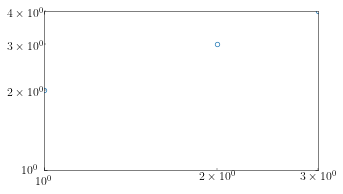

In [16]:
# testing matplotlib on my machine

fig, ax, color, marker = create_plot()

plt.loglog([1, 2, 3, 4])